# SFR-Stellar Mass-Size Paper

These is the notebook for the MS-paper


In [2]:
import numpy as np
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Stellar Mass limit

We need to decide what our stellar mass limit will be.  We need to think about this because at a given absolute magnitude limit, the lowest SFR objects will have the highest $M_*/L$ and hence the highest $M_*$.  Converseley at a fixed $M_*$ cut, the lowest SFR objects will be the faintest.  So, if we make our $M_*$ cut too low, objects with low SFR will fall below our detection limit.

Could cause a bias such that we miss the most suppressed SF-galaxies, or those with the smallest 24um disks?

In [8]:
run ~/github/LCS/python/Python3/LCS_MSpaper.py

normalizing by radius of disk


/Users/grudnick/github/LCS/python/Python3/LCSbase.py:73: RuntimeWarning: divide by zero encountered in true_divide
  self.MAG24 = 2.5*np.log10(3631./(self.s.FLUX24*1.e-6))
/Users/grudnick/github/LCS/python/Python3/LCSbase.py:85: RuntimeWarning: invalid value encountered in true_divide
  self.AGNKAUFF= ((np.log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(np.log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (np.log10(self.s.N2FLUX/self.s.HAFLUX) > 0.)) #& (self.s.HAEW > 0.)
/Users/grudnick/github/LCS/python/Python3/LCSbase.py:85: RuntimeWarning: invalid value encountered in log10
  self.AGNKAUFF= ((np.log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(np.log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (np.log10(self.s.N2FLUX/self.s.HAFLUX) > 0.)) #& (self.s.HAEW > 0.)
/Users/grudnick/github/LCS/python/Python3/LCSbase.py:85: RuntimeWarning: invalid value encountered in greater
  self.AGNKAUFF= ((np.log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(np.log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (np.log10(se

nothing happening here
(1800, 1800)
Using UV + IR SFR


/Users/grudnick/github/LCS/python/Python3/LCSbase.py:148: RuntimeWarning: divide by zero encountered in log10
  self.sb_obs[flag]=self.s.fcmag1[flag] + 2.5*np.log10(np.pi*((self.s.fcre1[flag]*mipspixelscale)**2)*self.s.fcaxisratio1[flag])
/Users/grudnick/github/LCS/python/Python3/LCSbase.py:162: RuntimeWarning: invalid value encountered in greater
  self.HIflag = self.s.HIMASS > 0.


## Different selection cuts

This shows how all the different selection cuts manifest themselves in the SFR-$M_*$ plane.  In all plots, red are the objects removed by the flag.

The first plot is for all the galaxies and the second and third are separated by core and exterior.

The horizontal green line is the SFR corresponding to our LIR limit.  I took the 0.086 from Elbaz and divided it by 1.74 to convert to Chabrier (Salim+16).

The blue line is my fit to the MS (see below for details.)

****************fit parameters [ 0.70194788 -7.4065244 ]


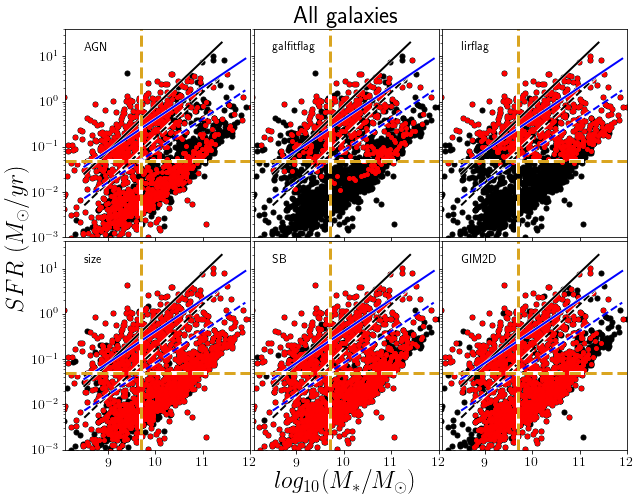

In [9]:
g.plotSFRStellarmasssel()

****************fit parameters [ 0.70194788 -7.4065244 ]


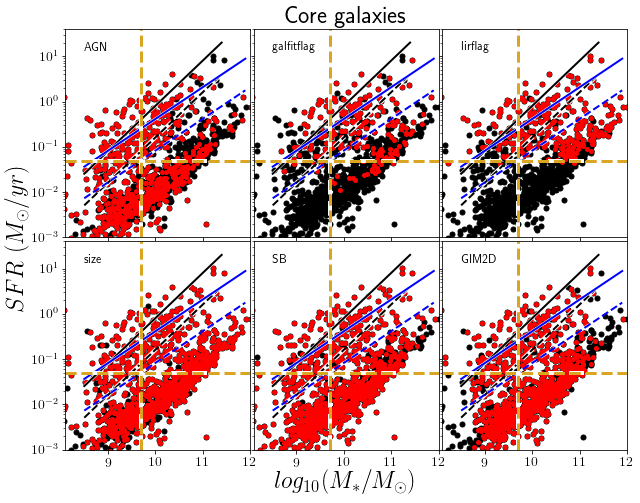

In [11]:
g.plotSFRStellarmasssel(subsample='core')

****************fit parameters [ 0.70194788 -7.4065244 ]


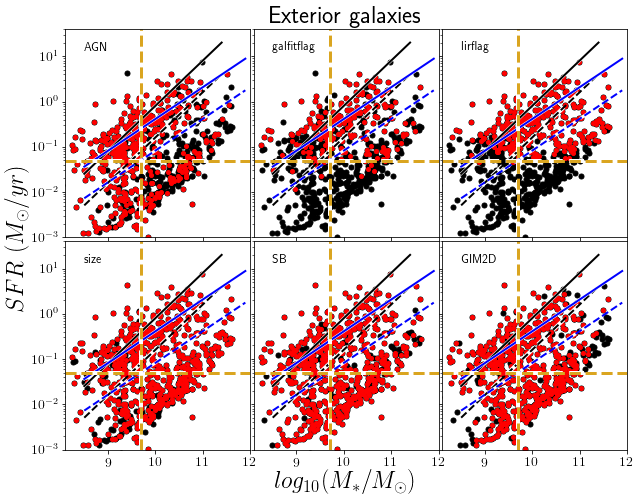

In [12]:
g.plotSFRStellarmasssel('exterior')

## Final Sample
This shows the SFR-$M_*$ distribution for all galaxies and those that pass the final selection.  It seems that making a cut at log($M_*$)>9.5 excludes galaxies at the bottom of the main sequence.  The cut below, at log($M_*)>9.7$ seems to work. 

The solid lines are for SFR(MS), the dashed for SFR(MS)/5.  Black is for Elbaz+11, Salmon is for Salim+07 for their pure SF sample, blue is our fit to the non-AGN galaxies above our LIR limit with log(Mstar)>9.5 and with SFR>SFR_MS(Elbaz; Mstar)/6. 

This seems to show that there isn't any different selection between core and cluster.  However, it does seem that the Elbaz and Salim lines lie above ours.  The difference is much in excess of the factor of 1.58 that you would expect if there were some IMF mismatch.

****************fit parameters [ 0.70194788 -7.4065244 ]


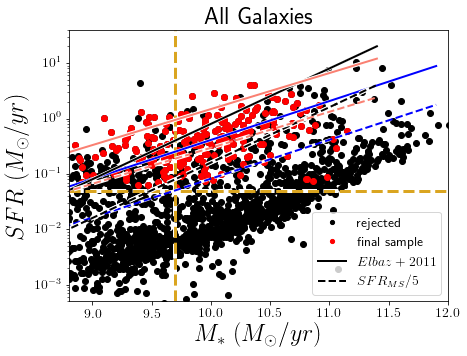

In [13]:
g.plotSFRStellarmassall()
g.plotelbaz()
g.plotsalim07()

****************fit parameters [ 0.70194788 -7.4065244 ]


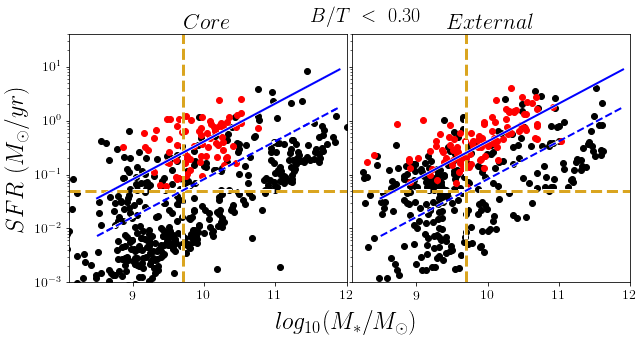

In [14]:
g.plotSFRStellarmassallenv()

###### The SFR-mass plot coded by size

On the left I show all the galaxies in our sample and on the right the running median. Both environments have similar median SFRs but different sizes.  The solid blue line is a fit to the non-AGN galaxies above our LIR limit with log(Mstar)>9.5 and with SFR>SFR_MS(Elbaz; Mstar)/10.

No handles with labels found to put in legend.


****************fit parameters [ 0.70194788 -7.4065244 ]


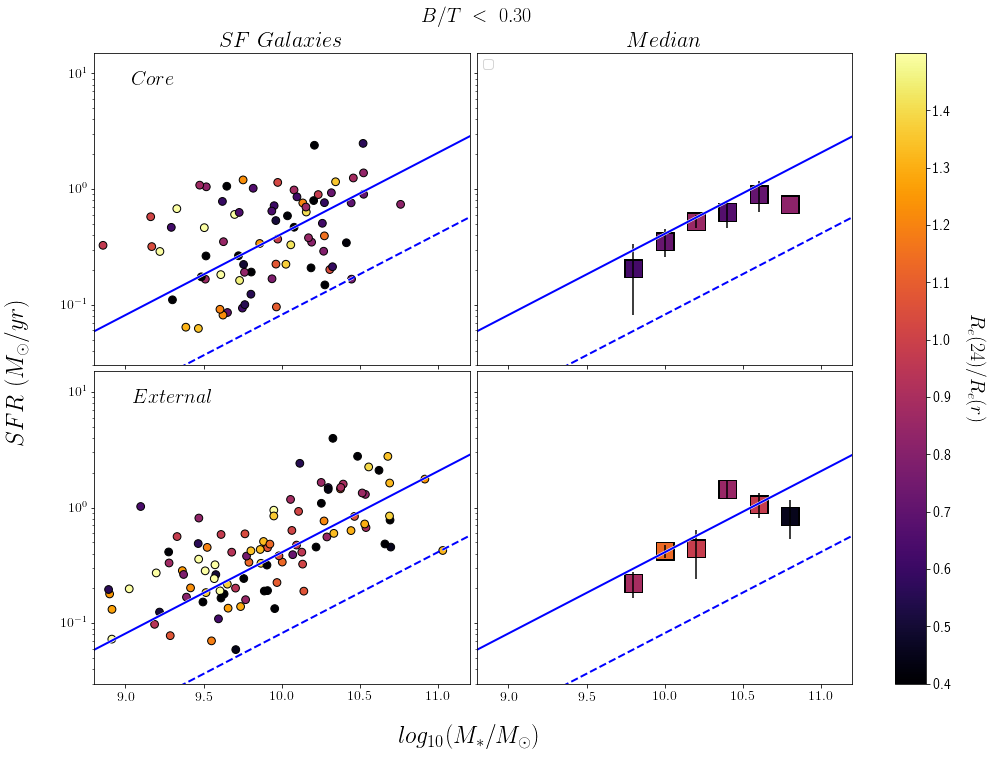

No handles with labels found to put in legend.


****************fit parameters [ 0.70194788 -7.4065244 ]


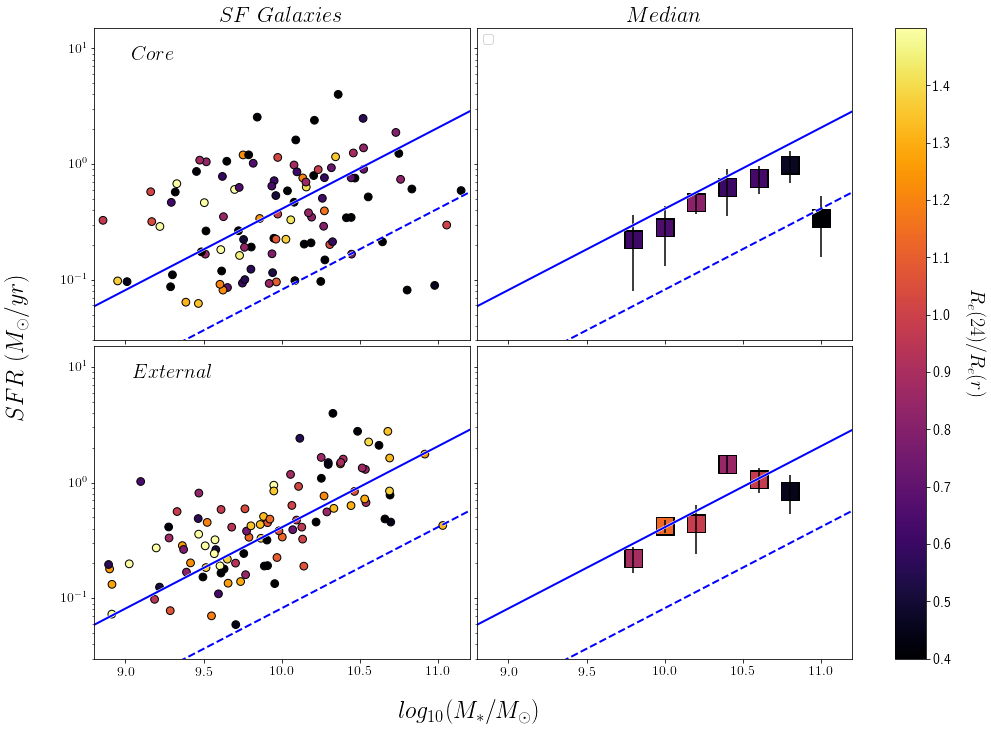

In [15]:
g.plotSFRStellarmass_sizebin()
g.plotSFRStellarmass_sizebin(btcutflag=False)

galaxies in the core have smaller R24/Rd than external galaxies at most stellar masses

No handles with labels found to put in legend.


****************fit parameters [ 0.70194788 -7.4065244 ]


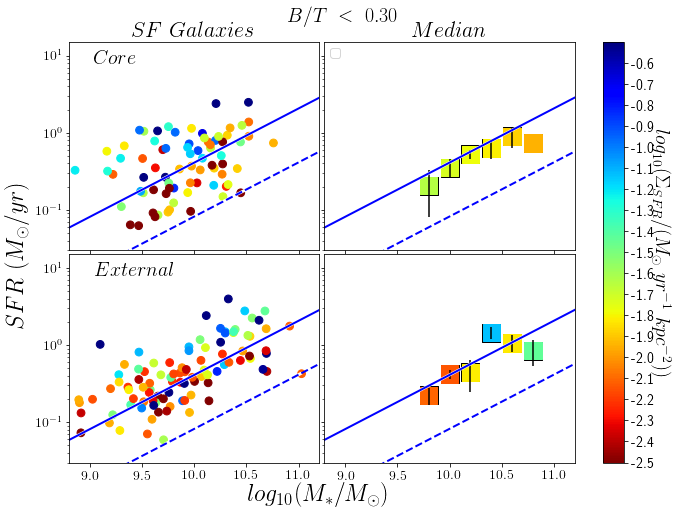

In [16]:
g.plotSFRStellarmass_musfrbin()

galaxies in the core have higher muSFR than external galaxies at lower stellar masses.  However, the external galaxies have higher muSFR at higher masses.  This result doesn't change if I color code by log(median(musfr)) or median(log(musfr)).  Also, the result does not qualitatively change if I remove the B/T cut.

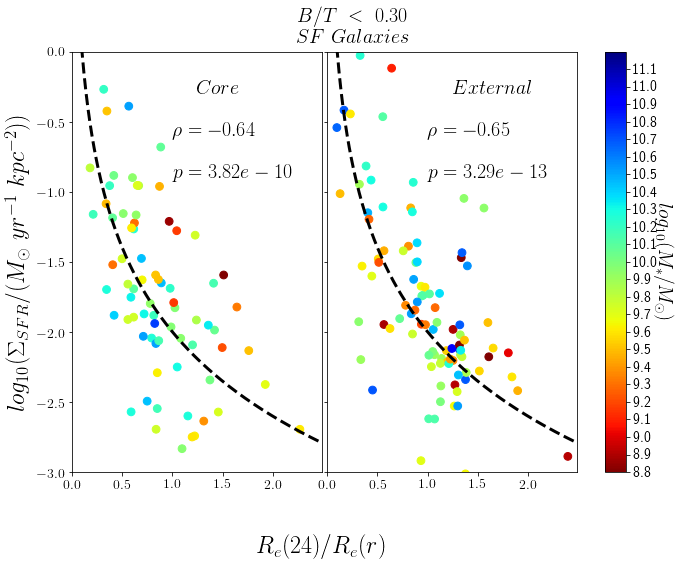

In [17]:
g.musfr_size()

muSFR is computed as 0.5 * SFR / (pi * R24**2).  The dashed line is y = log10(1/x**2) and so shows the expected correlation.  It is not clear that there is any residual correlation.

****************fit parameters [ 0.70194788 -7.4065244 ]


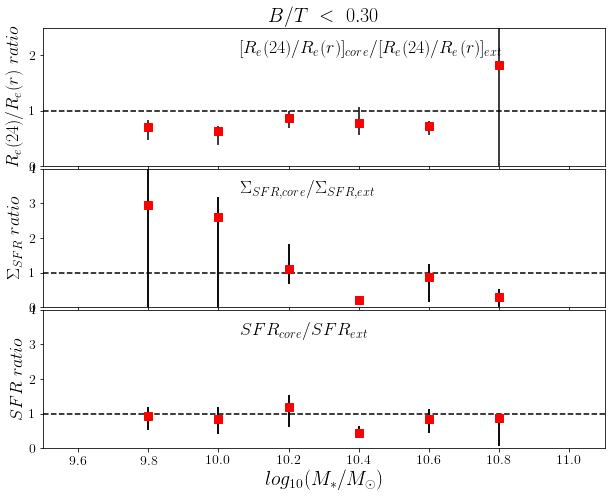

In [18]:
g.sizediff_musfrdiff_mass()

This shows that the sizes are systematically lower in the core.  It also shows that the SFR surface densities show no clear trend with mass of the ratio between the two environments. Also, the result does not qualitatively change if I remove the B/T cut.  Finally, the results don't change if I do them in slices around the main sequence.

****************fit parameters [ 0.70194788 -7.4065244 ]
Core
median lower 68% SFRdiff confidence interval -0.3828350034345789
median lower 90% SFRdiff confidence interval -0.6072921540072045
External
median lower 68% SFRdiff confidence interval -0.24682737761804674
median lower 90% SFRdiff confidence interval -0.44353503311933196
Core has lower 68% SFR limit 0.923 of the time
Core has lower 90% SFR limit 0.884 of the time
KS Test:
D =   0.22
p-vale = 0.11293 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.37
p-vale = 0.23830 (prob that samples are from same distribution)


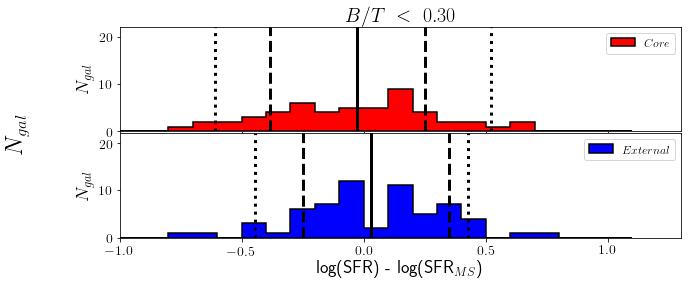

****************fit parameters [ 0.70194788 -7.4065244 ]
Core
median lower 68% SFRdiff confidence interval -0.5238791478725346
median lower 90% SFRdiff confidence interval -0.8022957111791911
External
median lower 68% SFRdiff confidence interval -0.3408309236663385
median lower 90% SFRdiff confidence interval -0.7063070923770098
Core has lower 68% SFR limit 0.945 of the time
Core has lower 90% SFR limit 0.695 of the time
KS Test:
D =   0.23
p-vale = 0.03616 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   1.00
p-vale = 0.12593 (prob that samples are from same distribution)


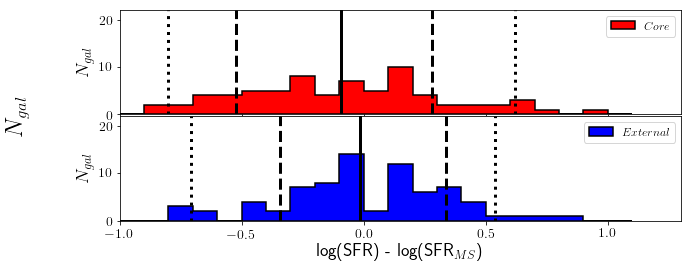

In [19]:
g.sfr_offset()
g.sfr_offset(btcutflag=False)

Although there is a tail to lower SFR in the core, we can't reject the hypothesis that these are drawn from the same distribution.  Below I'm showing some versions of this in different mass slices.  

****************fit parameters [ 0.70194788 -7.4065244 ]
Core
median lower 68% SFRdiff confidence interval -0.34441894784132643
median lower 90% SFRdiff confidence interval -0.4648416515774514
External
median lower 68% SFRdiff confidence interval -0.24682737761804674
median lower 90% SFRdiff confidence interval -0.4343083910965646
Core has lower 68% SFR limit 0.839 of the time
Core has lower 90% SFR limit 0.751 of the time
KS Test:
D =   0.25
p-vale = 0.13925 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.33
p-vale = 0.49180 (prob that samples are from same distribution)


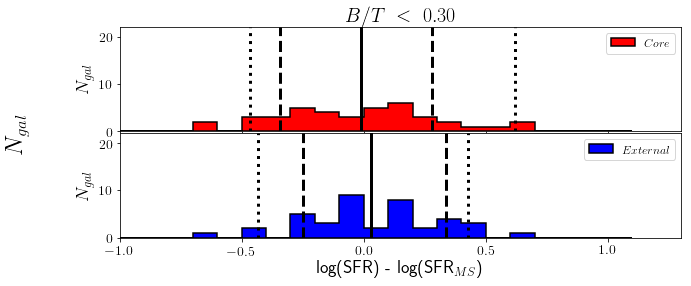

In [20]:
g.sfr_offset(logmassmin=9.7,logmassmax=10.3)

****************fit parameters [ 0.70194788 -7.4065244 ]
Core
median lower 68% SFRdiff confidence interval -0.4250797824757129
median lower 90% SFRdiff confidence interval -0.6346058035596869
External
median lower 68% SFRdiff confidence interval -0.0880567600607236
median lower 90% SFRdiff confidence interval -0.19527288997964115
Core has lower 68% SFR limit 0.999 of the time
Core has lower 90% SFR limit 0.973 of the time
KS Test:
D =   0.44
p-vale = 0.00701 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   3.76
p-vale = 0.00999 (prob that samples are from same distribution)


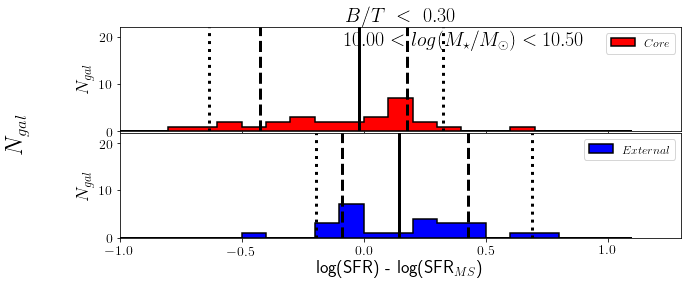

In [21]:
g.sfr_offset(logmassmin=10.,logmassmax=10.5)

****************fit parameters [ 0.70194788 -7.4065244 ]
Core
median lower 68% SFRdiff confidence interval -0.5238791478725346
median lower 90% SFRdiff confidence interval -0.7044161981486567
External
median lower 68% SFRdiff confidence interval -0.1693015218958962
median lower 90% SFRdiff confidence interval -0.39040925040081476
Core has lower 68% SFR limit 0.967 of the time
Core has lower 90% SFR limit 0.983 of the time
KS Test:
D =   0.40
p-vale = 0.13586 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.68
p-vale = 0.17416 (prob that samples are from same distribution)


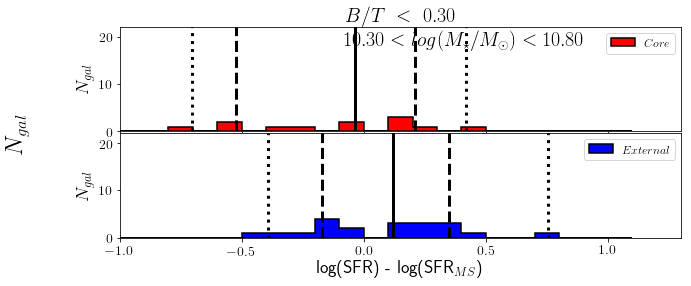

In [22]:
g.sfr_offset(logmassmin=10.3,logmassmax=10.8)

Doesn't look like the differences become significant with different mass bins.  At least not without fiddling a lot with the binning.

Core - Spearman Rank
rho =  -0.4310605286361902
p =  0.00010136184603349731


No handles with labels found to put in legend.


External - Spearman Rank
rho =  -0.15225431451326593
p =  0.12851922028012175


No handles with labels found to put in legend.


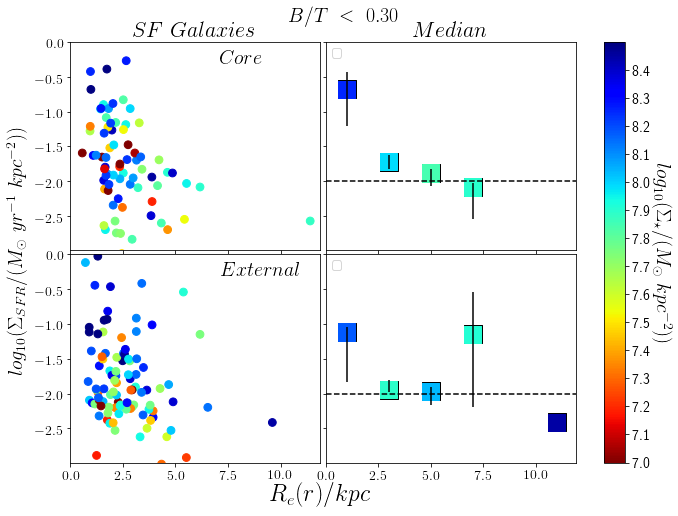

In [23]:
g.plotmusfr_optdisksize()

At a fixed $R_e(r)$, galaxies with lower $\Sigma_{SFR}$ also have lower $\Sigma_{\star}$.  Clusters are missing a small number galaxies at high $R_e(r)$ with large $\Sigma_{SFR}$ but it's not clear if it's significant.  My guess is that's what driving the poor correlation in the external sample.  At fixed $R_e(r)$ it also appears that the cluster could have $\Sigma_\star$ than the external sample but it's not clear.  $Sigma_\star$ is measured using the single Sersic fits to the galaxy from the NSA.  We might want to do these using GIM2D to be consistent.  Or compute the $R_e$ analytically from the Bulge-disk fits, again to be consistent.

The horizontal dashed line is for reference only

Core - Spearman Rank
rho =  0.2811756664388243
p =  0.013875680189961867


No handles with labels found to put in legend.


External - Spearman Rank
rho =  0.4368225790556267
p =  4.948314882468881e-06


No handles with labels found to put in legend.


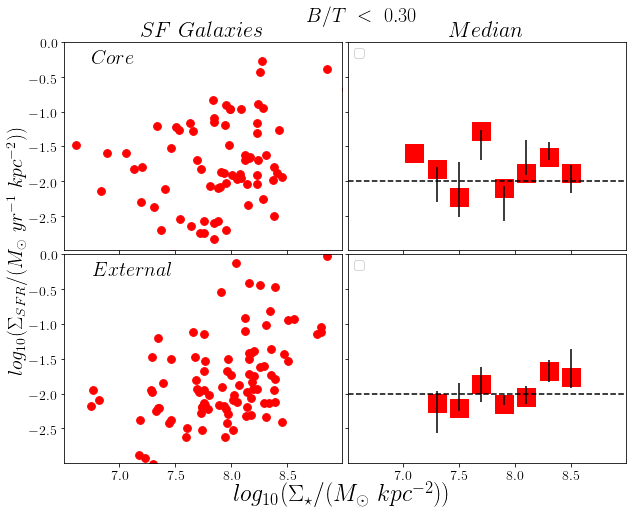

In [24]:
g.plotmusfr_mustar()


This might just be telling us that smaller stellar disks also have smaller SF disks.  But interestingly, it's not just size but also surface density.

3 bins of mass
########## 9.7 10.1
log mass range  9.7 10.1
SFR surface density
KS Test:
D =   0.41
p-vale = 0.01599 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   2.24
p-vale = 0.03835 (prob that samples are from same distribution)
Stellar mass surface density
KS Test:
D =   0.31
p-vale = 0.12282 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.71
p-vale = 0.16866 (prob that samples are from same distribution)
########## 10.1 10.5
log mass range  10.1 10.5
SFR surface density
KS Test:
D =   0.46
p-vale = 0.01572 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   1.42
p-vale = 0.08325 (prob that samples are from same distribution)
Stellar mass surface density
KS Test:
D =   0.43
p-vale = 0.02748 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   1.46
p-vale = 0.08060 (prob that samples are from same distribution)
########## 10.5 10.899999999999999
log mass ran

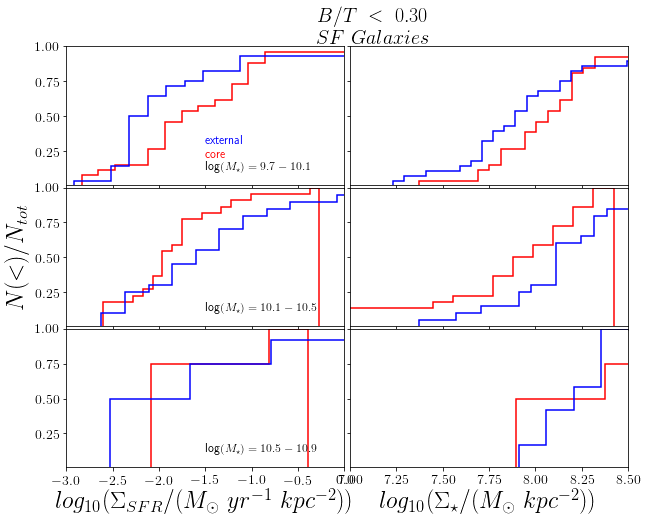

In [25]:
g.musfr_mustar_ks()

This shows the distribution of $\Sigma_{SFR}$ and $\Sigma_\star$.  While the probability that these are different distributions is high with this mass binning as I show below, the significance of the difference goes away with a slightly different mass binning.  So I would say that they are identical distributions

4 bins of mass
########## 9.6 9.9
log mass range  9.6 9.9
SFR surface density
KS Test:
D =   0.35
p-vale = 0.13495 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.25
p-vale = 0.45454 (prob that samples are from same distribution)
Stellar mass surface density
KS Test:
D =   0.30
p-vale = 0.27527 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.92
p-vale = 0.92169 (prob that samples are from same distribution)
########## 9.9 10.2
log mass range  9.9 10.2
SFR surface density
KS Test:
D =   0.35
p-vale = 0.13495 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.19
p-vale = 0.42603 (prob that samples are from same distribution)
Stellar mass surface density
KS Test:
D =   0.25
p-vale = 0.49734 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -1.15
p-vale = 1.18727 (prob that samples are from same distribution)
########## 10.2 10.5
log mass range  10.2 10.5
SFR 

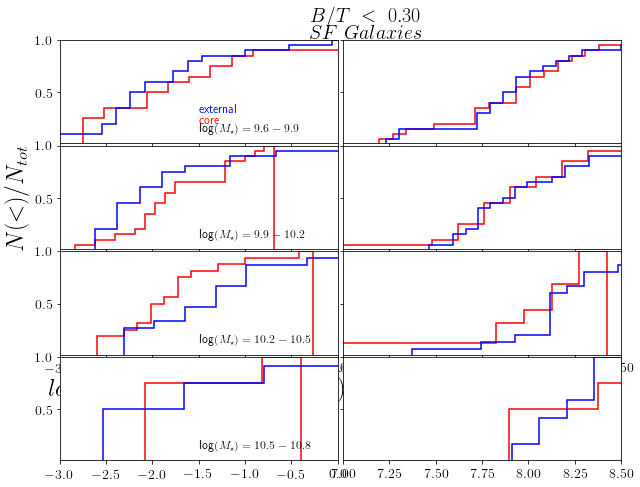

In [26]:
g.musfr_mustar_ks(logmassmin=9.6, logmassmax=10.8,dlogmass=0.3)

*********fit parameters [-2.28122189 -0.07450221]


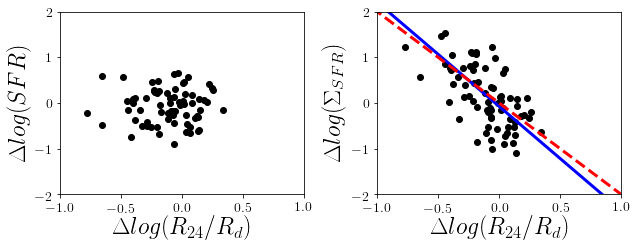

In [27]:
g.matchsamp_mass()

This plot shows mass-matched samples constructed by choosing all external galaxies within +/-0.3 dex in mass.  I omit core galaxies with no field galaxies in this mass range.  Each point shows how one of the core galaxies differs from the value for the median of the matched sample.  The red line shows the intrinsic correlation you'd expect in the right-hand axis, given that $\Sigma_{SFR}$ is inversely proportional to $R_{24}^2$.  This assumes that the optical disks are the same size and that the SFRs for the two samples are the same.

The blue line shows a simple fit to the black points assuming uniform errors.  It appears that there is no residual correlation aside from what is expected.  I wonder what would happen if I included errors or bootstrapped the line.

for the left panel
rho =  -0.2978700133978618
p =  0.008966092510207671
Galaxies with low  R24, high n, and low Sigma SFR, all relative
[ 68305. 146606.  72659. 166167. 103648.] [0.82470399 0.63997495 0.84069818 0.54306495 0.46031362] [-0.77416639 -0.70206155 -0.34333089 -0.48186984 -0.22615193]
*********fit parameters for the right panel [-2.04043823 -0.06905   ]


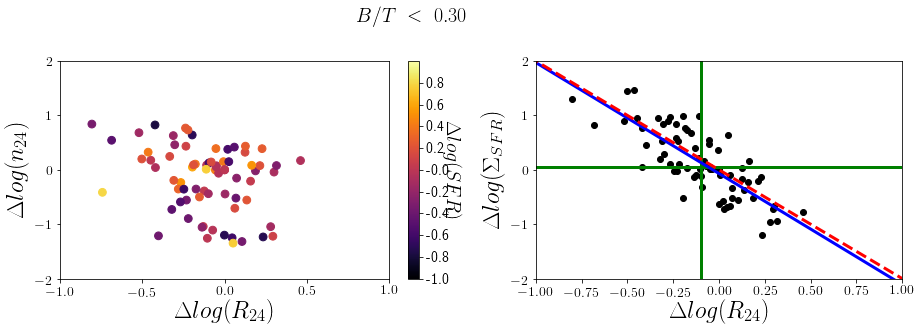

for the left panel
rho =  -0.35468118195956455
p =  0.00020534904751949354
Galaxies with low  R24, high n, and low Sigma SFR, all relative
[ 70696.  43836.  68305. 146606. 146636.  72623.  72659. 146115. 146121.
 166167.  89063. 103648.] [0.48801178 0.68571132 0.80879045 0.63997495 0.50543755 0.67067313
 0.81145966 1.11565781 0.7639848  0.52715141 0.56149685 0.52024817] [-0.44040556 -0.39567618 -0.75196443 -0.70206155 -0.64535498 -0.23901859
 -0.3222343  -0.41349331 -0.388137   -0.41769712 -0.82635195 -0.22615193]
*********fit parameters for the right panel [-1.97141621 -0.09535164]


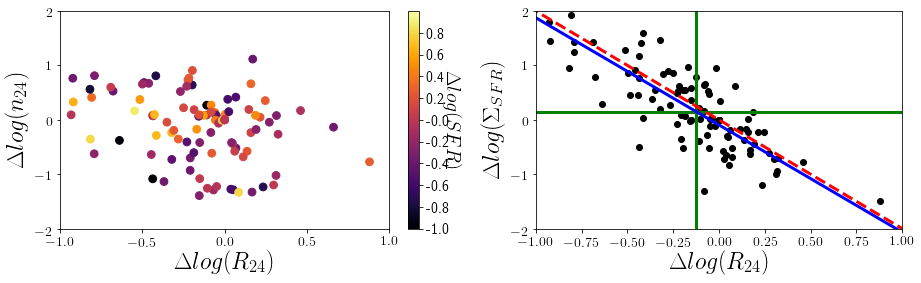

In [28]:
g.plot_n24diff_mipssizediff()
g.plot_n24diff_mipssizediff(btcutflag=False)

This is now constructed using samples matched in stellar mass and optical disk size.  The left panel is color-coded by the difference in SFR.  From van der Wel et al. 2012 Fig. 7 it looks like bigger sizes will result in slightly larger sersic n.  This is the opposite trend from what we see in the left panel, which indicates that larger sizes yield lower sersic n.  It also looks like galaxies with lower $n$ also have lower SF.  Also from van der Wel et al. 2012, it appears that making the sersic $n$ larger makes the integrated profile brighter.  That would mean that increased n could result in systematically higher SFR, which could drive some of the correlation of $\Delta \Sigma_{SFR}$ with $\Delta n_{24}$

In the right panel, the scatter is lower than in the matchsamp_mass plot, indicating that the scatter may have been driven by the scatter in optical disk size.  The green line is the median $\Delta log \Sigma_{SFR}$ There may be a weak trend but I need to do a better job with the errors to confirm this. The red line is the expected correlation and the blue line is the fit (without data uncertainties) to the data 

In the plot below, I highlight the sources with $\Delta log(n_{24})>0.45$ and $\Delta log(SFR)<-0.2$.  These are the red/orange points at the top of the plot.  These are the x's in the figure below

/Users/grudnick/github/LCS/python/Python3/LCS_MSpaper.py:1592: RuntimeWarning: invalid value encountered in less
  cind = np.where((self.membflag & self.sampleflag) & (self.gim2d.B_T_r < btcut))
/Users/grudnick/github/LCS/python/Python3/LCS_MSpaper.py:1593: RuntimeWarning: invalid value encountered in less
  eind = np.where((~self.membflag & self.sampleflag) & (self.gim2d.B_T_r < btcut))
/Users/grudnick/github/LCS/python/Python3/LCS_MSpaper.py:1594: RuntimeWarning: invalid value encountered in less
  cflag = (self.membflag & self.sampleflag) & (self.gim2d.B_T_r < btcut)
/Users/grudnick/github/LCS/python/Python3/LCS_MSpaper.py:1595: RuntimeWarning: invalid value encountered in less
  eflag = (~self.membflag & self.sampleflag) & (self.gim2d.B_T_r < btcut)
/Users/grudnick/github/LCS/python/Python3/LCS_MSpaper.py:1632: RuntimeWarning: divide by zero encountered in true_divide
  self.sfrdense = 0.5 * self.SFR_USE / (np.pi * self.mipssize**2)
/Users/grudnick/github/LCS/python/Python3/LCS_MSp

****************fit parameters [ 0.70194788 -7.4065244 ]
****************fit parameters [ 0.70194788 -7.4065244 ]


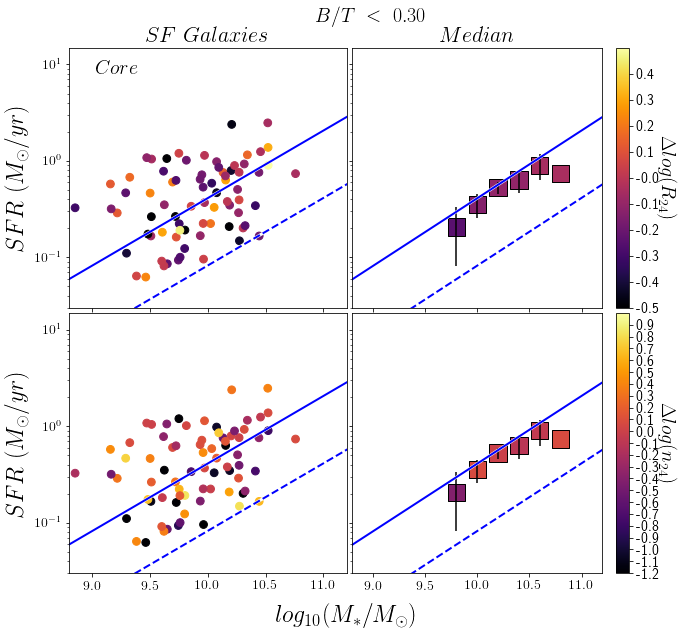

/Users/grudnick/github/LCS/python/Python3/LCS_MSpaper.py:1632: RuntimeWarning: divide by zero encountered in true_divide
  self.sfrdense = 0.5 * self.SFR_USE / (np.pi * self.mipssize**2)
/Users/grudnick/github/LCS/python/Python3/LCS_MSpaper.py:1642: RuntimeWarning: invalid value encountered in less
  mmatchflag = (eflag) & (abs(dlMstar) < dlMstarsel) & (self.s.NSAID[i] != self.s.NSAID) & (abs(drd) < drdsel)


****************fit parameters [ 0.70194788 -7.4065244 ]
****************fit parameters [ 0.70194788 -7.4065244 ]


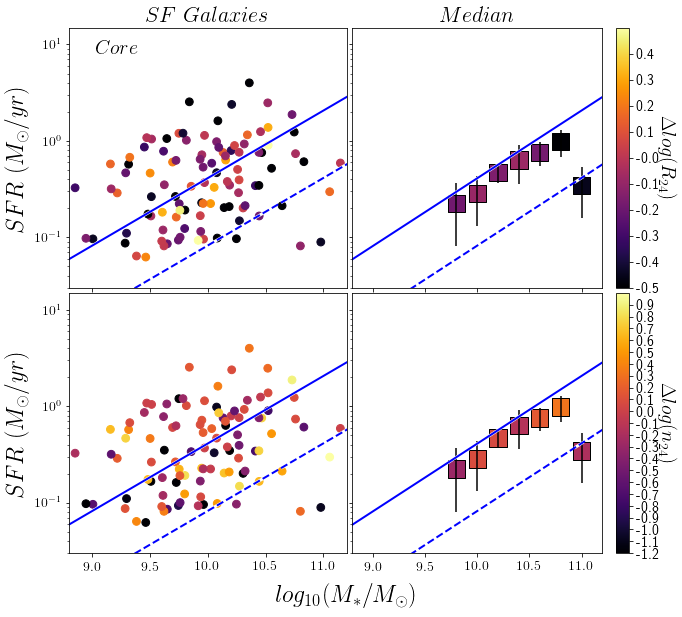

In [9]:
g.plotSFRStellarmass_matchsamp()
g.plotSFRStellarmass_matchsamp(btcutflag=False)

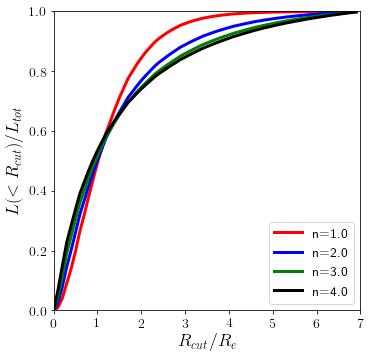

In [30]:
g.sersicint()

This plot shows how the luminosity of a sersic profile depends on the radius at which I cut the profile off.  This is for different sersic indices and all curves are normalized to to have the same central intensity.  The total luminosity is computed at R<7Re.